# 2️.Modeling & Threshold Tuning – Credit Card Fraud Detection

**Objective:**  
- Train a logistic regression model with class imbalance handling  
- Evaluate metrics (Recall, Precision, ROC-AUC)  
- Tune decision threshold for optimal fraud detection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve


In [3]:
# Load the scaled dataset from EDA step
df = pd.read_csv("creditcard.csv")  # Or directly use df from EDA if in same session

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)

C:\Users\srina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC: 0.9727841509423127


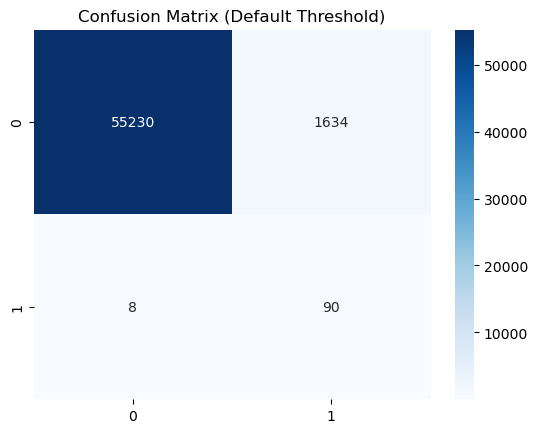

In [5]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Default Threshold)")
plt.show()


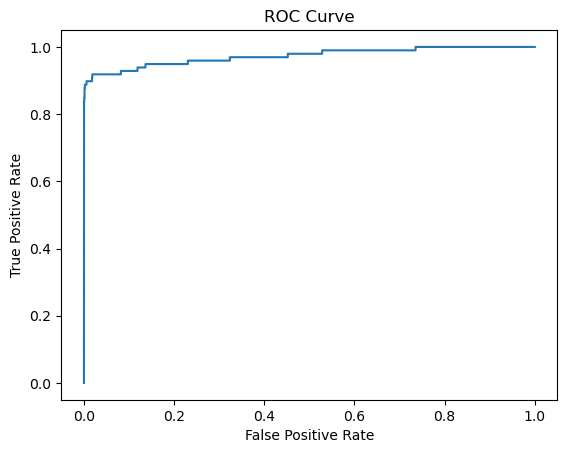

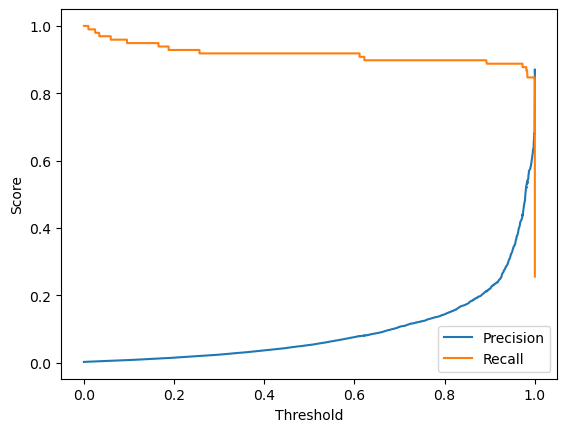

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.95      0.97     56962



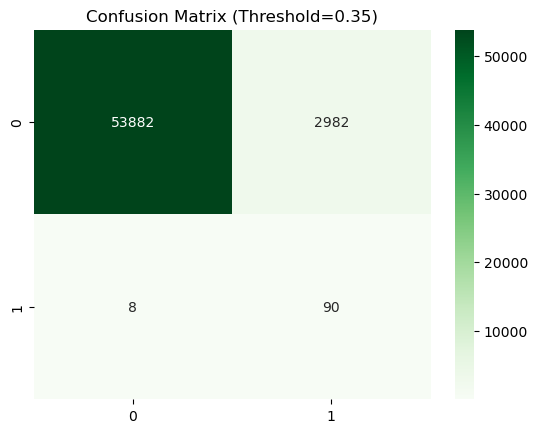

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

# Example tuned threshold
threshold = 0.35
y_pred_tuned = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_tuned))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()
